In [1]:

%pip install -q keras
%pip install tensorflow keras numpy pandas matplotlib opencv-python-headless



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os 

images = os.listdir('/Users/sayeshagoel/Desktop/inspirit ai /AugmentedAlzheimerDataset copy/Training folder')
images[:10]

["Alzheimer's Disease", '.DS_Store', 'Control', 'Mild Cognitive Impairment']

In [3]:
import pandas as pd 

AD = pd.read_csv('stats.csv')
AD

,Sample,Diagnostic,Sex,Age,MMSE,CSF Amyloid (pg/mL),CSF Total tau (pg/mL),CSF Phosphorylated tau (pg/mL),APOE4,Progression to Alzheimer's Disease,Progression time (months)
0,1,Alzheimer's Disease,Female,68,26,688.0,369.0,107.0,Yes,NaN,NaN
1,2,Alzheimer's Disease,Female,66,22,489.0,482.0,176.0,Yes,NaN,NaN
2,3,Alzheimer's Disease,Female,72,23,509.0,329.0,114.0,Yes,NaN,NaN
3,4,Alzheimer's Disease,Male,73,25,544.0,482.0,80.0,No,NaN,NaN
4,5,Alzheimer's Disease,Female,75,15,303.0,806.0,120.0,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
207,208,Control,Female,74,28,1004.0,314.0,58.8,No,NaN,NaN
208,209,Control,Female,76,28,1215.0,312.0,51.7,No,NaN,NaN
209,210,Control,Female,67,30,470.0,86.2,15.6,No,NaN,NaN
210,211,Control,Male,71,29,712.0,463.0,87.3,No,NaN,NaN


Training Accuracy: 0.6390532544378699
Test Accuracy: 0.7674418604651163
Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        25
           1       0.75      0.67      0.71        18

    accuracy                           0.77        43
   macro avg       0.76      0.75      0.76        43
weighted avg       0.77      0.77      0.77        43



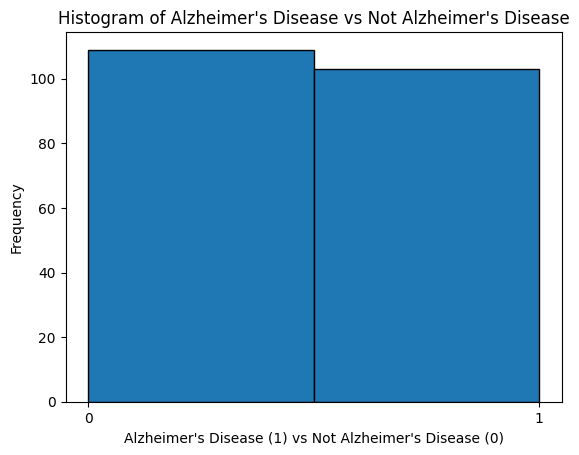

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load data
AD = pd.read_csv('stats.csv')

# Create target variable
AD['new_column'] = AD['Diagnostic'].apply(lambda x: 1 if x == "Alzheimer's Disease" else 0)
y = AD['new_column'].to_numpy()

# Select features
biomarkers = ['CSF Amyloid (pg/mL)', 'CSF Total tau (pg/mL)', 'CSF Phosphorylated tau (pg/mL)']
X = AD[biomarkers].to_numpy()

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Make predictions
train_predictions = lr.predict(X_train)
test_predictions = lr.predict(X_test)

# Evaluate accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print classification report for more detailed performance metrics
print("Classification Report (Test Set):")
print(classification_report(y_test, test_predictions))

# Plot histogram of target variable
plt.hist(AD['new_column'], bins=2, edgecolor='black')
plt.xlabel('Alzheimer\'s Disease (1) vs Not Alzheimer\'s Disease (0)')
plt.ylabel('Frequency')
plt.title('Histogram of Alzheimer\'s Disease vs Not Alzheimer\'s Disease')
plt.xticks([0, 1])
plt.show()


In [9]:
from joblib import dump, load

# Save model
dump(lr, 'your_lr_model.joblib')

# Load model
lr = load('your_lr_model.joblib')

import h5py

# Save model
with h5py.File('your_lr_model.h5', 'w') as f:
    f.create_dataset('lr_model', data=lr)

# Load model
with h5py.File('your_lr_model.h5', 'r') as f:
    lr = f['lr_model'][:]

TypeError: Object dtype dtype('O') has no native HDF5 equivalent